# **Оценка стоимости подержанных автомобилей**

## 0. Описание задачи

Проанализировать зависимость цен на подержанные автомобили от года первой регистрации, пробега и других факторов по данным, указанным в объявлениях. Создать модель, предсказывающую подходящую цену для подержанного автомобиля, исходя из выявленной в данных зависимости. Использовать модель линейной регрессии.

In [1]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

## 1. Чтение данных и предобработка

In [2]:
# Загрузка данных из файла на диске
df = pd.read_csv('data/autos.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

- `dateCrawled`	- Дата и время, когда объявление было впервые просмотрено поисковым роботом. (Date)
- `name` - Название автомобиля. (String)
- `seller`	- Тип продавца (частный или дилер). (String)
- `offerType`	- Тип предложения (например, продажа, ремонт и т.д.). (String)
- `price`	- Цена автомобиля. (Integer)
- `abtest`	- Тип теста abtest (A или B). (String)
- `vehicleType`	- Тип транспортного средства (например, внедорожник, седан и т.д.). (String)
- `yearOfRegistration`	- Год, в котором автомобиль был впервые зарегистрирован. (Integer)
- `gearbox`	- Тип коробки передач (механическая или автоматическая). (String)
- `powerPS`	- Мощность двигателя автомобиля в л.с. (Integer)
- `model`	- Модель автомобиля. (String)
- `kilometer`	- Пробег в км. (Integer)
- `monthOfRegistration`	- Месяц, в котором автомобиль был впервые зарегистрирован. (Integer)
- `fuelType`	- Тип топлива (например, дизельное топливо, бензин и т.д.). (String)
- `brand`	- Марка автомобиля. (String)
- `notRepairedDamage`	- Есть ли неотремонтированные повреждения автомобиля. (String)
- `dateCreated`	- Дата размещения объявления. (Date)
- `nrOfPictures`	- Количество фотографий автомобиля. (Integer)
- `postalCode`	- Почтовый индекс места, где было размещено объявление. (Integer)
- `lastSeen`	- Дата последнего просмотра объявления. (Date)

In [3]:
df.head(5)

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Исключим из таблицы столбцы, связанные с датой публикации и просмотра объявлений: dateCrawled, dateCreated, lastSeen. Эти столбцы не характеризуют автомобиль, хотя и важны для решения других задач, связанных анализом продаж подержанных автомобилей.
Уберём столбец abtest, чтобы не усложнять задачу учётом маркетинга. Столбец index также не влияет на нашу задачу.

In [4]:
df = df.drop(['index', 'dateCrawled', 'dateCreated', 'lastSeen', 'abtest'], axis=1) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   name                 371528 non-null  object
 1   seller               371528 non-null  object
 2   offerType            371528 non-null  object
 3   price                371528 non-null  int64 
 4   vehicleType          333659 non-null  object
 5   yearOfRegistration   371528 non-null  int64 
 6   gearbox              351319 non-null  object
 7   powerPS              371528 non-null  int64 
 8   model                351044 non-null  object
 9   kilometer            371528 non-null  int64 
 10  monthOfRegistration  371528 non-null  int64 
 11  fuelType             338142 non-null  object
 12  brand                371528 non-null  object
 13  notRepairedDamage    299468 non-null  object
 14  nrOfPictures         371528 non-null  int64 
 15  postalCode           371528 non-nu

Категориальные признаки:
- `name` - Название автомобиля. (String)
- `vehicleType`	- Тип транспортного средства (например, внедорожник, седан и т.д.). (String)
- `model`	- Модель автомобиля. (String)
- `fuelType`	- Тип топлива (например, дизельное топливо, бензин и т.д.). (String)
- `brand`	- Марка автомобиля. (String)

Бинарные категориальные признаки:
- `offerType`	- Тип предложения (продажа или покупка). (String)
- `seller`	- Тип продавца (частный или дилер). (String)
- `notRepairedDamage`	- Есть ли неотремонтированные повреждения автомобиля (да или нет). (String)
- `gearbox`	- Тип коробки передач (механическая или автоматическая). (String)


Числовые признаки:
- `price`	- Цена автомобиля. (Integer)
- `yearOfRegistration`	- Год, в котором автомобиль был впервые зарегистрирован. (Integer)
- `powerPS`	- Мощность двигателя автомобиля в л.с. (Integer)
- `kilometer`	- Пробег в км. (Integer)
- `monthOfRegistration`	- Месяц, в котором автомобиль был впервые зарегистрирован. (Integer)
- `nrOfPictures`	- Количество фотографий автомобиля. (Integer)
- `postalCode`	- Почтовый индекс места, где было размещено объявление. (Integer)

Изменим тип для категориальных признаков.

In [5]:
df['name'] = df['name'].astype('category')
df['vehicleType'] = df['vehicleType'].astype('category')
df['model'] = df['model'].astype('category')
df['fuelType'] = df['fuelType'].astype('category')
df['brand'] = df['brand'].astype('category')
df['offerType'] = df['offerType'].astype('category')
df['seller'] = df['seller'].astype('category')
df['notRepairedDamage'] = df['notRepairedDamage'].astype('category')
df['gearbox'] = df['gearbox'].astype('category')

In [6]:
df.describe(include=['category'])

,name,seller,offerType,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage
count,371528,371528,371528,333659,351319,351044,338142,371528,299468
unique,233531,2,2,8,2,251,7,40,2
top,Ford_Fiesta,privat,Angebot,limousine,manuell,golf,benzin,volkswagen,nein
freq,657,371525,371516,95894,274214,30070,223857,79640,263182


Найдём уникальные значения в каждом из столбцов данных.

In [7]:
unique_values = df.T.apply(lambda x: x.unique(), axis=1)
print(unique_values)

name                   [Golf_3_1.6, A5_Sportback_2.7_Tdi, Jeep_Grand_...
seller                                              [privat, gewerblich]
offerType                                              [Angebot, Gesuch]
price                  [480, 18300, 9800, 1500, 3600, 650, 2200, 0, 1...
vehicleType            [nan, coupe, suv, kleinwagen, limousine, cabri...
yearOfRegistration     [1993, 2011, 2004, 2001, 2008, 1995, 1980, 201...
gearbox                                        [manuell, automatik, nan]
powerPS                [0, 190, 163, 75, 69, 102, 109, 50, 125, 101, ...
model                  [golf, nan, grand, fabia, 3er, 2_reihe, andere...
kilometer              [150000, 125000, 90000, 40000, 30000, 70000, 5...
monthOfRegistration           [0, 5, 8, 6, 7, 10, 12, 11, 2, 3, 1, 4, 9]
fuelType               [benzin, diesel, nan, lpg, andere, hybrid, cng...
brand                  [volkswagen, audi, jeep, skoda, bmw, peugeot, ...
notRepairedDamage                                  

Столбец nrOfPictures имеет одно уникальное значение 0 и не даёт нам никакой полезной информации, поэтому исключим его.

In [8]:
df = df.drop('nrOfPictures', axis=1)

## 2. Визуализация, обработка данных и характеристики

### Числовые признаки

Далее идёт информация о числовых признаках. Таблица ниже отражает такие характеристики числовых признаков: количество, среднее значение, стандартное отклонение, минимальное и максимальное значения, нижний и верхний квартили и медиану.

In [9]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,99998.00000


Столбцы price, yearOfRegistaration, powerPC и  monthOfRegistration явно имеют нереалистичные максимумы и/или минимумы. Необходимо избавиться от выбросов!

График зависимости цены автомобилей от года первичной регистрации. На графике видны явные выбросы со значениями цены более 2 млрд, а также выбросы по году регистрации (год регистрации точно не может быть менее 1900 и более 2016).

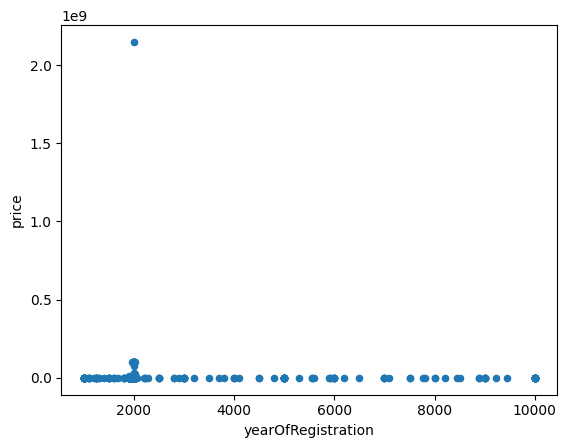

In [10]:
df.plot(kind='scatter', x='yearOfRegistration', y='price')
pass

In [11]:
df['yearOfRegistration']

0         1993
1         2011
2         2004
3         2001
4         2008
          ... 
371523    2005
371524    2000
371525    1996
371526    2002
371527    2013
Name: yearOfRegistration, Length: 371528, dtype: int64

Диаграммы рассеивания

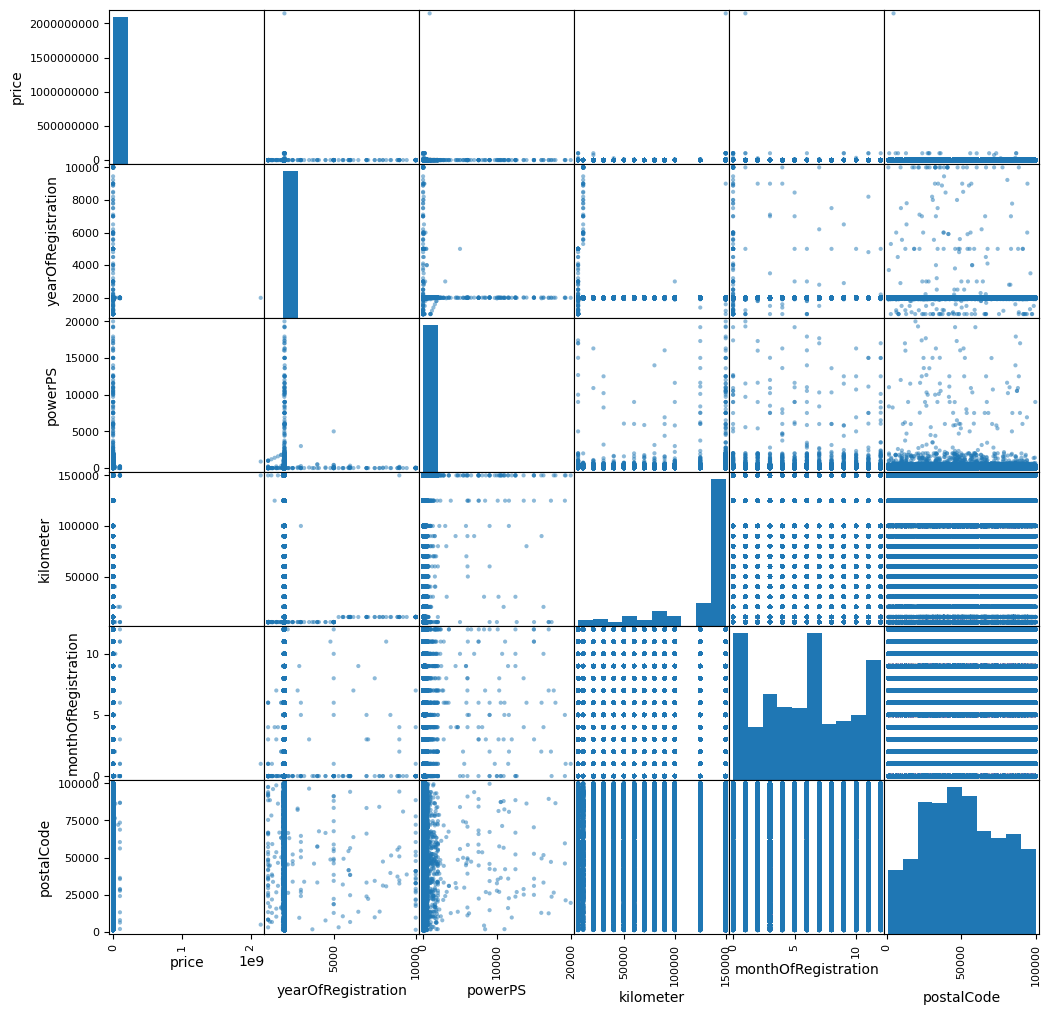

In [12]:
pd.plotting.scatter_matrix(df, figsize = (12, 12))
pass

Распределение числовых признаков:

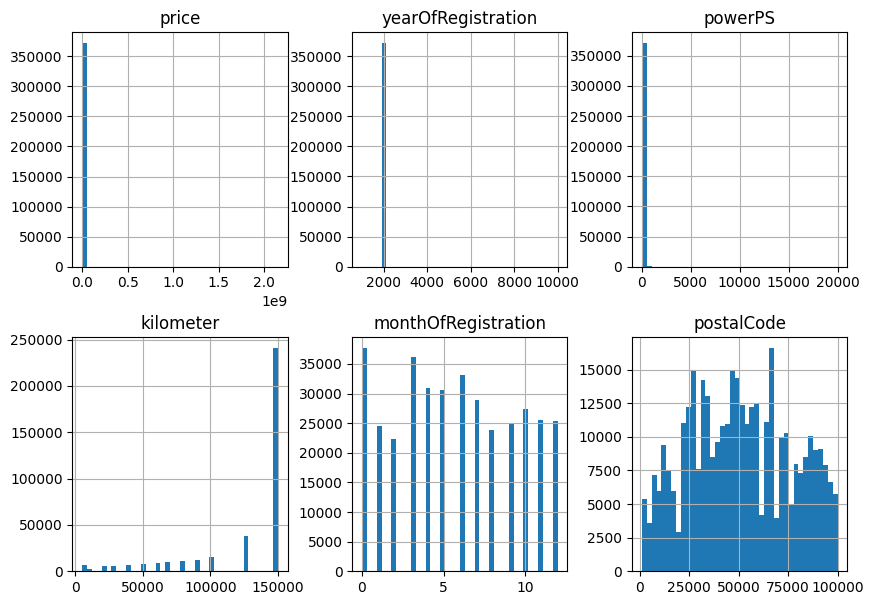

In [13]:
df.hist(bins=40, layout=(2,3), figsize=(10,7));

Для обнаружения выбросов найдем квантили для признаков:

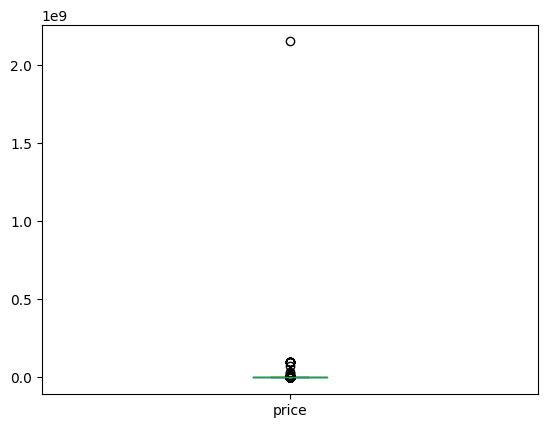

In [14]:
df['price'].plot(kind='box')
pass

In [15]:
df['price'].quantile([0.005,.01,.03,.035,.05,.1,.15,.2,.25,.5,.9,.95,.99,.995])

0.005        0.0
0.010        0.0
0.030        1.0
0.035       80.0
0.050      200.0
0.100      500.0
0.150      700.0
0.200      900.0
0.250     1150.0
0.500     2950.0
0.900    14000.0
0.950    19790.0
0.990    36000.0
0.995    47500.0
Name: price, dtype: float64

Как можно видеть, значения цен 94,5% автомобилей находятся в пределах от 200 до 47500 евро (это значения квантилей, соответствующих уровням  0.05 и  0.995 соответственно).

In [16]:
df[df['price']<=500.0]

,name,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,Golf_3_1.6,privat,Angebot,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,70435
7,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,19348
15,KA_Lufthansa_Edition_450€_VB,privat,Angebot,450,kleinwagen,1910,NaN,0,ka,5000,0,benzin,ford,NaN,24148
16,Polo_6n_1_4,privat,Angebot,300,NaN,2016,NaN,60,polo,150000,0,benzin,volkswagen,NaN,38871
23,Stadtflitzer,privat,Angebot,450,kleinwagen,1997,manuell,50,arosa,150000,5,benzin,seat,nein,9526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371473,Subaru_Allrad,privat,Angebot,400,kombi,1991,manuell,0,legacy,150000,0,benzin,subaru,NaN,24558
371486,Zu_verkaufen,privat,Angebot,350,kleinwagen,1996,NaN,65,punto,150000,0,NaN,fiat,NaN,25436
371492,Opel_Corsa_B_Swing_grau,privat,Angebot,390,kleinwagen,1997,automatik,0,corsa,100000,6,benzin,opel,ja,17509
371495,Opel_Tigra,privat,Angebot,180,NaN,1995,NaN,0,NaN,125000,3,benzin,opel,NaN,41470


In [17]:
df[(df['price']<=500.0) & (df['notRepairedDamage']!='nein')]

,name,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,Golf_3_1.6,privat,Angebot,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,70435
15,KA_Lufthansa_Edition_450€_VB,privat,Angebot,450,kleinwagen,1910,NaN,0,ka,5000,0,benzin,ford,NaN,24148
16,Polo_6n_1_4,privat,Angebot,300,NaN,2016,NaN,60,polo,150000,0,benzin,volkswagen,NaN,38871
24,MERCEDES_200E__TÜV_04/2016,privat,Angebot,500,limousine,1990,manuell,118,andere,150000,10,benzin,mercedes_benz,ja,35390
40,Suche_Opel_corsa_a_zu_verschenken,privat,Angebot,0,NaN,1990,NaN,0,corsa,150000,1,benzin,opel,NaN,56412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371473,Subaru_Allrad,privat,Angebot,400,kombi,1991,manuell,0,legacy,150000,0,benzin,subaru,NaN,24558
371486,Zu_verkaufen,privat,Angebot,350,kleinwagen,1996,NaN,65,punto,150000,0,NaN,fiat,NaN,25436
371492,Opel_Corsa_B_Swing_grau,privat,Angebot,390,kleinwagen,1997,automatik,0,corsa,100000,6,benzin,opel,ja,17509
371495,Opel_Tigra,privat,Angebot,180,NaN,1995,NaN,0,NaN,125000,3,benzin,opel,NaN,41470


In [18]:
df[df['notRepairedDamage']!='nein'].shape

(108346, 15)

Большая часть автомобилей с ценой менее 500 евро имеют неотремонтированные повреждения. Это доля равняется 29655/41732≈0.71, то есть около 71%.

In [19]:
df[df['price']>700.0]

,name,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
1,A5_Sportback_2.7_Tdi,privat,Angebot,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,66954
2,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,90480
3,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,91074
4,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,60437
6,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,67112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,39576
371524,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,26135
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,87439
371526,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,40764


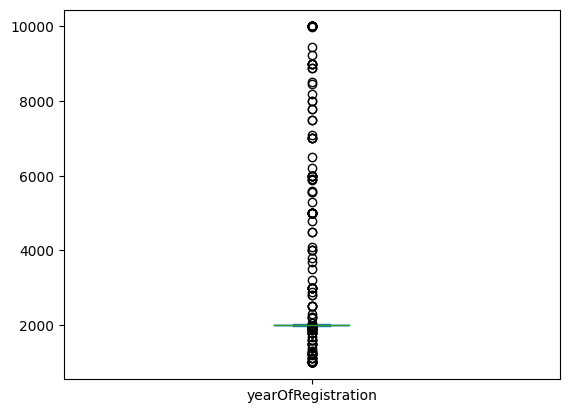

In [20]:
df['yearOfRegistration'].plot(kind='box')
pass

In [21]:
df['yearOfRegistration'].quantile([0.005,.01,.05,.1,.2,.25,.5,.9,.95,.99,.995])

0.005    1970.0
0.010    1978.0
0.050    1992.0
0.100    1995.0
0.200    1998.0
0.250    1999.0
0.500    2003.0
0.900    2013.0
0.950    2016.0
0.990    2018.0
0.995    2018.0
Name: yearOfRegistration, dtype: float64

Год регистрации 94,5% автомобилей находится в пределах от 1970 до 2016 года (это значения квантилей, соответствующих уровням  0.005 и  0.95 соответственно). Известно, что год размещения объявлений не может быть больше 2016, поэтому год регистрации автомобиля не может его превышать.

Удалим строки таблицы, в которых `yearOfRegistration` выходит за пределы квантилей  0.005 и 0.95 и в которых `price` выходит за пределы квантилей 0.05 и 0,995.

In [22]:
data = df[(df['price']>=200.0) & (df['price']<=47500.0) & (df['yearOfRegistration']>=1970) & (df['yearOfRegistration']<=2016)]

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337101 entries, 0 to 371527
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   name                 337101 non-null  category
 1   seller               337101 non-null  category
 2   offerType            337101 non-null  category
 3   price                337101 non-null  int64   
 4   vehicleType          319272 non-null  category
 5   yearOfRegistration   337101 non-null  int64   
 6   gearbox              323247 non-null  category
 7   powerPS              337101 non-null  int64   
 8   model                322290 non-null  category
 9   kilometer            337101 non-null  int64   
 10  monthOfRegistration  337101 non-null  int64   
 11  fuelType             315021 non-null  category
 12  brand                337101 non-null  category
 13  notRepairedDamage    280168 non-null  category
 14  postalCode           337101 non-null  int64   
dtype

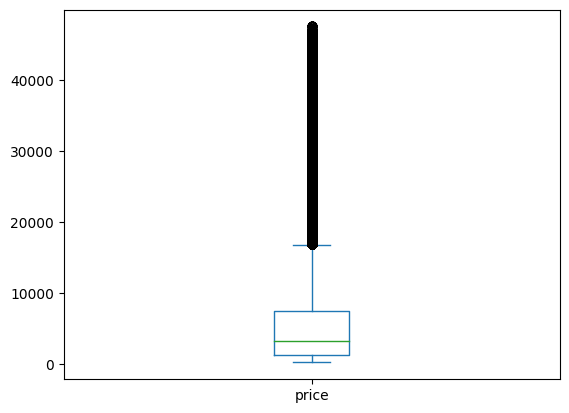

In [24]:
data['price'].plot(kind='box')
pass

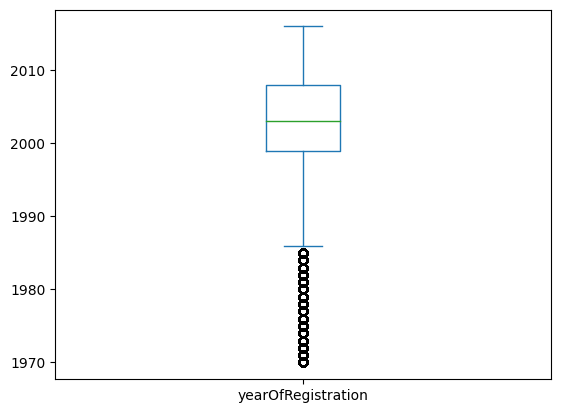

In [25]:
data['yearOfRegistration'].plot(kind='box')
pass

In [26]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,337101.000000,337101.000000,337101.000000,337101.000000,337101.000000,337101.000000
mean,5704.427937,2003.143892,117.840991,126074.277442,5.885690,51124.077285
std,6624.327663,6.542494,183.472674,39113.686659,3.648747,25742.679242
min,200.000000,1970.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1300.000000,1999.000000,75.000000,125000.000000,3.000000,30880.000000
50%,3200.000000,2003.000000,109.000000,150000.000000,6.000000,50126.000000
75%,7500.000000,2008.000000,150.000000,150000.000000,9.000000,71720.000000
max,47500.000000,2016.000000,20000.000000,150000.000000,12.000000,99998.000000


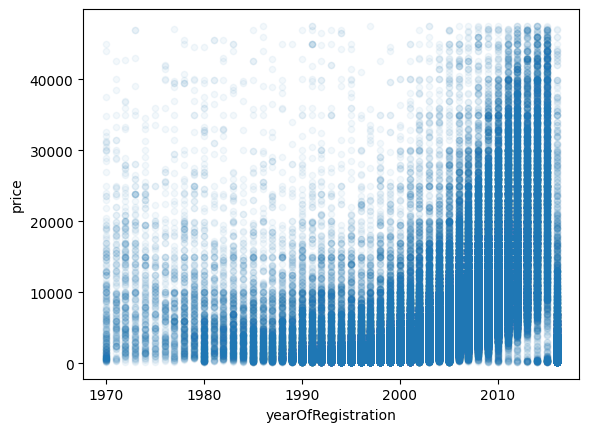

In [27]:
data.plot(kind='scatter', x='yearOfRegistration', y='price', alpha=0.05)
pass

Заметим, что в столбце monthOfRegistration есть строки со значением месяца 0. Удалим их.

In [28]:
data[data['monthOfRegistration']==0]

,name,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,Golf_3_1.6,privat,Angebot,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,70435
9,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,27472
16,Polo_6n_1_4,privat,Angebot,300,NaN,2016,NaN,60,polo,150000,0,benzin,volkswagen,NaN,38871
36,Opel_Kadett_E_CC,privat,Angebot,1600,andere,1991,manuell,75,kadett,70000,0,NaN,opel,NaN,2943
54,Opel_signum_1.9_cdti,privat,Angebot,4700,kombi,2005,manuell,0,signum,150000,0,NaN,opel,nein,88433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371460,Polo_g40_auch_Tausch_vag...no_vr6_gti_1.8t,privat,Angebot,3500,NaN,1995,NaN,0,polo,150000,0,NaN,volkswagen,NaN,74579
371473,Subaru_Allrad,privat,Angebot,400,kombi,1991,manuell,0,legacy,150000,0,benzin,subaru,NaN,24558
371482,Peugeot_206,privat,Angebot,1300,kleinwagen,1999,manuell,75,2_reihe,125000,0,NaN,peugeot,NaN,35102
371486,Zu_verkaufen,privat,Angebot,350,kleinwagen,1996,NaN,65,punto,150000,0,NaN,fiat,NaN,25436


In [29]:
data = data[(data['monthOfRegistration']<=12) & (data['monthOfRegistration']>=1)]

In [30]:
data['monthOfRegistration'].value_counts()

3     33713
6     30712
4     28671
5     28428
7     26701
10    25623
11    23926
12    23603
9     23508
1     22560
8     22074
2     20777
Name: monthOfRegistration, dtype: int64

Теперь разберемся с мощностью двигателя (powerPS) и пробегом (kilometer).

In [31]:
data['powerPS'].quantile([0.005,.01,.05,.1,.2,.25,.5,.9,.95,.99,.995])

0.005      0.0
0.010      0.0
0.050      0.0
0.100     54.0
0.200     69.0
0.250     75.0
0.500    110.0
0.900    197.0
0.950    232.0
0.990    333.0
0.995    387.0
Name: powerPS, dtype: float64

Удалим строки в столбце powerPS, значения которых выходят за квантиль 0.05 и 0.995.

In [32]:
data = data[(data['powerPS']>=54) & (data['powerPS']<=387)]

In [33]:
data[(data['powerPS']>=203)]

,name,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
21,BMW_530i_TÜV_7/17_Scheckheftgepflegt_sehr_gute...,privat,Angebot,3699,limousine,2002,automatik,231,5er,150000,7,benzin,bmw,nein,68309
33,BMW_325i_Aut.,privat,Angebot,18000,limousine,2007,automatik,218,3er,20000,5,benzin,bmw,nein,39179
41,E_500_Avantgarde_AMG_Ausstattung,privat,Angebot,7500,limousine,2002,automatik,306,e_klasse,150000,4,NaN,mercedes_benz,NaN,33649
42,BMW_E60_530XD,privat,Angebot,12500,limousine,2006,automatik,231,5er,150000,11,diesel,bmw,NaN,46119
56,BMW_435i_Sport_coupe,privat,Angebot,39600,coupe,2014,automatik,306,andere,30000,7,benzin,bmw,nein,10435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371481,PORSCHE_944_S2_CABRIO_1991_3_0_211PS_ANTHAZIT/...,privat,Angebot,12800,cabrio,1991,manuell,211,andere,150000,7,benzin,porsche,nein,21147
371484,Opel_vectra_c_mit_diblas_komplett_umbau,privat,Angebot,2999,kombi,2004,manuell,234,vectra,100000,1,NaN,opel,NaN,83364
371512,Mercedes_Benz_E_400_CDI_Avantgarde,privat,Angebot,5000,limousine,2003,automatik,260,e_klasse,150000,12,diesel,mercedes_benz,ja,90473
371520,turbo_defekt,privat,Angebot,3200,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja,96465


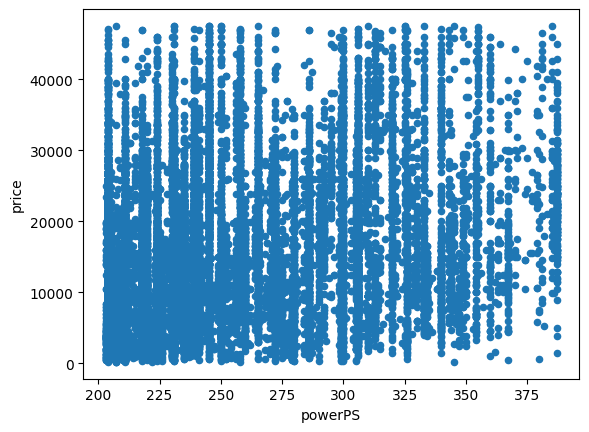

In [34]:
high_powerPS = data[(data['powerPS']>=203)]
#print(high_powerPS['powerPS'])
high_powerPS.plot(kind='scatter', x='powerPS', y='price')
pass

In [35]:
data['kilometer'].quantile([0.005,.01,.05,.1,.2,.25,.5,.9,.95,.99,.995])

0.005      5000.0
0.010     10000.0
0.050     40000.0
0.100     60000.0
0.200     90000.0
0.250    100000.0
0.500    150000.0
0.900    150000.0
0.950    150000.0
0.990    150000.0
0.995    150000.0
Name: kilometer, dtype: float64

Пробег корректировать не будем, так как минимальные и максимальные значения попадают в дипозон квантилей
0.005 и 0.995.

In [36]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,279909.000000,279909.000000,279909.000000,279909.000000,279909.000000,279909.000000
mean,6242.336727,2003.650526,127.970330,125242.239442,6.383657,51847.373429
std,6754.666752,6.182377,55.362389,39054.919040,3.346183,25751.133893
min,200.000000,1970.000000,54.000000,5000.000000,1.000000,1067.000000
25%,1600.000000,2000.000000,87.000000,100000.000000,4.000000,31319.000000
50%,3800.000000,2004.000000,116.000000,150000.000000,6.000000,51067.000000
75%,8450.000000,2008.000000,150.000000,150000.000000,9.000000,72631.000000
max,47500.000000,2016.000000,387.000000,150000.000000,12.000000,99998.000000


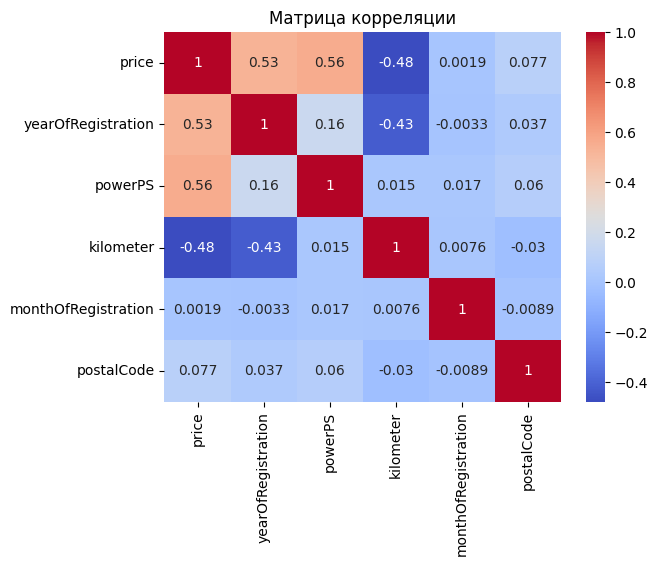

In [37]:
correlation_matrix = data.corr(numeric_only = True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

Матрица корреляции позволяет определить зависимость (корреляцию) между величинами (признаками). "Теплые" оттенки говорят о том, что с увеличением одной величины, другая также возрастает (положительная корреляция). "Холодные" оттенки говорят о том, что с увеличением одной величины, другая уменьшается(отрицательная корреляция). Таким образом, видно, что стоимость автомобилей сильно коррелирует со значением года первичной регистрации, так как более новые автомобили очевидно стоят дороже, а также с мощностью двигателя. Стоимость автомобилей уменьшается с увеличением значения их пробега, это тоже очевидно.

Слабо коррелируют с ценой месяц первичной регистрации и почтовый индекс. Действительно, месяц регистрации в отрыве от года не даёт никакой информации. А почтовый индекс, видимо, тоже не так важен, хотя он мог бы свидетельствовать о месте продажи и как-то влиять на цену.

### Категорильные признаки

Выведем гистограмму, отражающую количество автомобилей по типу кузова.

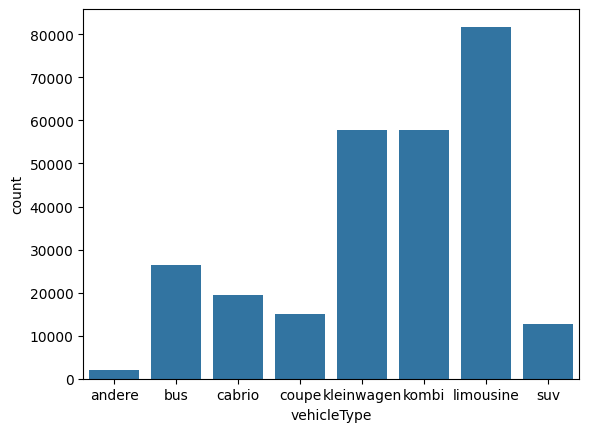

In [38]:
sns.countplot(x='vehicleType', data=data)
pass

Гистограмма кол-ва автомобилей по типу топлива:

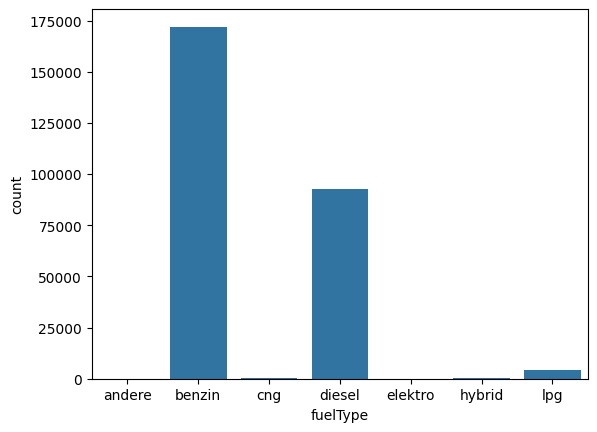

In [39]:
sns.countplot(x='fuelType', data=data)
pass

LPG - сжиженный природный газ.
CNG - водород или природный газ.
Andere - другое топливо.

Автомобили по брендам:

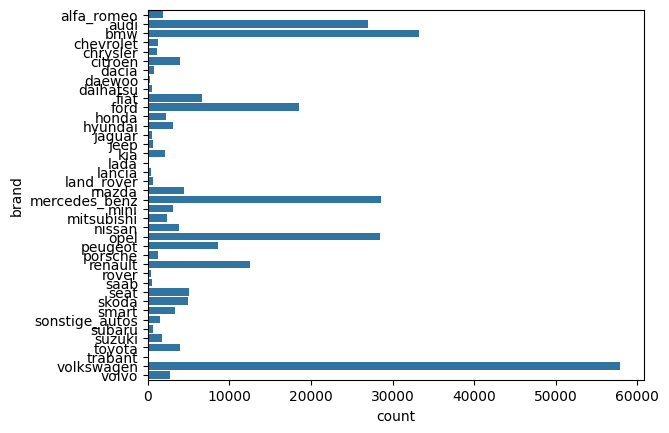

In [40]:
sns.countplot(y='brand', data=data)
pass

Коробка передач в автомобилях с разными типами кузова:

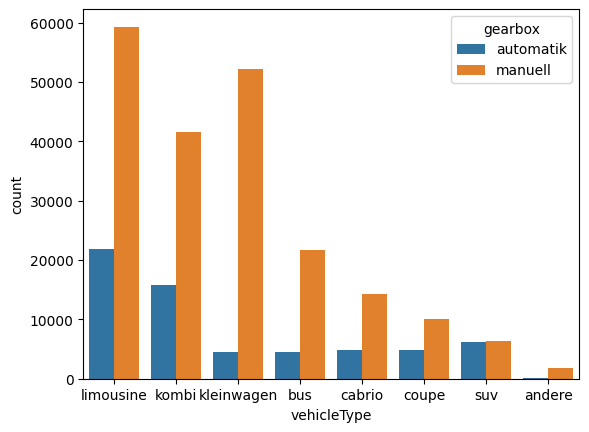

In [41]:
sns.countplot(x='vehicleType', order=data['vehicleType'].value_counts().index, hue='gearbox', data=data)
pass

Тип предложения:

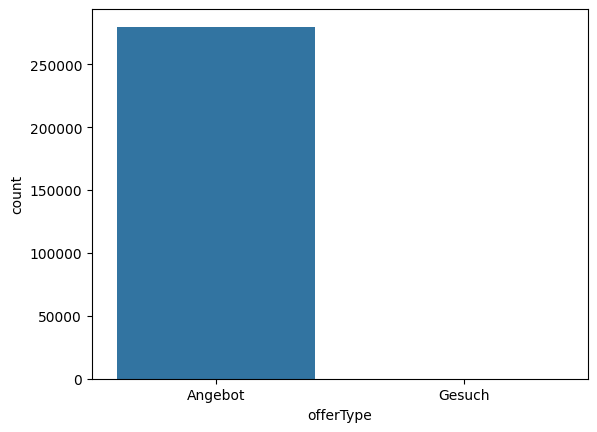

In [42]:
sns.countplot(x='offerType', data=data)
pass

In [43]:
data['offerType'].value_counts()

Angebot    279907
Gesuch          2
Name: offerType, dtype: int64

Так как подавляющее большинство объявлений - это продажа автомобиля, а не покупка, то уберём столбец offerType, чтобы избежать избыточности данных.

In [44]:
data = data.drop('offerType', axis=1)

Неторемонтированные повреждения автомобиля:

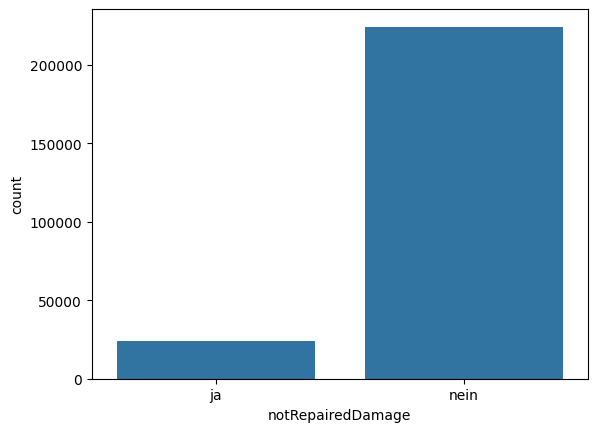

In [45]:
sns.countplot(x='notRepairedDamage', data=data)
pass

Продавцы автомобилей:

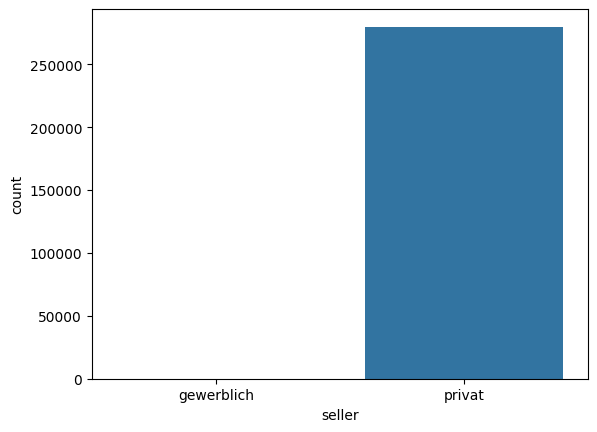

In [46]:
sns.countplot(x='seller', data=data)
pass

In [47]:
data['seller'].value_counts()

privat        279909
gewerblich         0
Name: seller, dtype: int64

Так как продаж автомобилей диллерами нет совсем, исключим столбец seller для того, чтобы избежать избыточности данных.

In [48]:
data = data.drop('seller', axis=1)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279909 entries, 1 to 371527
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   name                 279909 non-null  category
 1   price                279909 non-null  int64   
 2   vehicleType          273012 non-null  category
 3   yearOfRegistration   279909 non-null  int64   
 4   gearbox              276575 non-null  category
 5   powerPS              279909 non-null  int64   
 6   model                271620 non-null  category
 7   kilometer            279909 non-null  int64   
 8   monthOfRegistration  279909 non-null  int64   
 9   fuelType             269723 non-null  category
 10  brand                279909 non-null  category
 11  notRepairedDamage    248022 non-null  category
 12  postalCode           279909 non-null  int64   
dtypes: category(7), int64(6)
memory usage: 27.7 MB


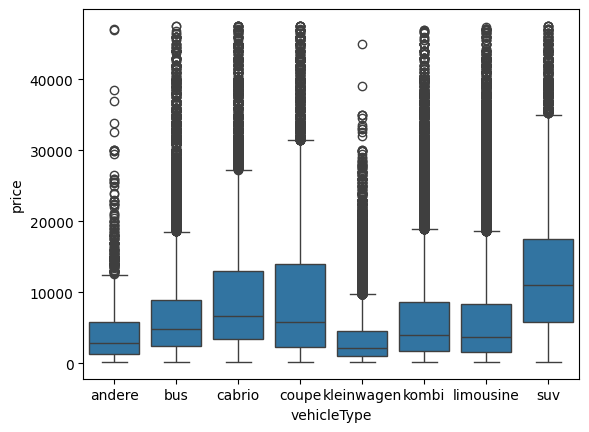

In [50]:
sns.boxplot(x="vehicleType", y="price", data=data)
pass

По значениям медиан понятно, что тип кузова заметно коррелирует с ценой.

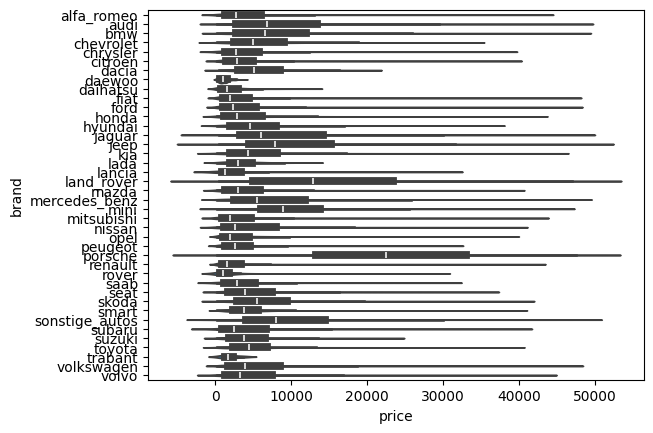

In [51]:
sns.violinplot(y="brand", x="price", data=data)
pass

Очевидно, что модель и марка автомобиля очень сильно влияют на цену. 

## 3. Обработка пропущенных значений

In [52]:
data.isna().sum()

name                       0
price                      0
vehicleType             6897
yearOfRegistration         0
gearbox                 3334
powerPS                    0
model                   8289
kilometer                  0
monthOfRegistration        0
fuelType               10186
brand                      0
notRepairedDamage      31887
postalCode                 0
dtype: int64

В таблице есть строки с пропущенными значениями в столбцах с категориальными признаками. Так как пропущенных значений достаточно много, выберем стратегию заполнения пустых значений модой.

In [53]:
from sklearn.impute import SimpleImputer
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
mis_val_columns = ['vehicleType', 'gearbox', 'model', 'fuelType', 'notRepairedDamage']
imp_cat.fit(data[mis_val_columns])

SimpleImputer(strategy='most_frequent')

In [54]:
data[mis_val_columns] = imp_cat.transform(data[mis_val_columns])

In [55]:
data.isna().sum()

name                   0
price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
postalCode             0
dtype: int64

In [56]:

data['vehicleType'] = data['vehicleType'].astype('category')
data['model'] = data['model'].astype('category')
data['fuelType'] = data['fuelType'].astype('category')
data['notRepairedDamage'] = data['notRepairedDamage'].astype('category')
data['gearbox'] = data['gearbox'].astype('category')

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279909 entries, 1 to 371527
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   name                 279909 non-null  category
 1   price                279909 non-null  int64   
 2   vehicleType          279909 non-null  category
 3   yearOfRegistration   279909 non-null  int64   
 4   gearbox              279909 non-null  category
 5   powerPS              279909 non-null  int64   
 6   model                279909 non-null  category
 7   kilometer            279909 non-null  int64   
 8   monthOfRegistration  279909 non-null  int64   
 9   fuelType             279909 non-null  category
 10  brand                279909 non-null  category
 11  notRepairedDamage    279909 non-null  category
 12  postalCode           279909 non-null  int64   
dtypes: category(7), int64(6)
memory usage: 27.7 MB


## 4. Кодирование категориальных признаков (начало)

In [58]:
data.describe(include=['category'])

,name,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage
count,279909,279909,279909,279909,279909,279909,279909
unique,166829,8,2,248,7,40,2
top,BMW_318i,limousine,manuell,golf,benzin,volkswagen,nein
freq,621,88663,216163,31704,182199,57903,256001


Большинство алгоритмов не умеют работать напрямую с категориальными признаками, поэтому необходимо предварительно их закодировать с помощью числовых принаков.

Бинарные признаки заменим на числовые со значениями 0 или 1.

In [59]:
data['gearbox'] = data['gearbox'].map({'manuell': 0, 'automatik': 1})
data['notRepairedDamage'] = data['notRepairedDamage'].map({'nein': 0, 'ja': 1})

In [60]:
data['notRepairedDamage'] = data['notRepairedDamage'].astype('int64')
data['gearbox'] = data['gearbox'].astype('int64')

Для небинарных категориальных признаков с небольшим количеством уникальных значений применим метод бинаризации (one-hot encoding). Вместо каждого такого признака будем использовать несколько новых бинарных признаков (dummy-признаков, dummy - фиктивный), отвечающих за каждую вариацию исходного признака.

In [61]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(data[['vehicleType', 'fuelType']])

OneHotEncoder(drop='if_binary', sparse_output=False)

In [62]:
dummies = pd.DataFrame(enc.transform(data[['vehicleType', 'fuelType']]),
                       columns=enc.get_feature_names_out(), index=data.index)
dummies.head()

,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_andere,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Добавим новые столбцы и убёрем старые.

In [63]:
data = pd.concat((data, dummies), axis=1).drop(['vehicleType', 'fuelType'], axis=1)

In [64]:
data.head(5)

,name,price,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,brand,notRepairedDamage,...,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_andere,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg
1,A5_Sportback_2.7_Tdi,18300,2011,0,190,golf,125000,5,audi,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,"Jeep_Grand_Cherokee_""Overland""",9800,2004,1,163,grand,125000,8,jeep,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,GOLF_4_1_4__3TÜRER,1500,2001,0,75,golf,150000,6,volkswagen,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,2008,0,69,fabia,90000,7,skoda,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,1995,0,102,3er,150000,10,bmw,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Признаки model и brand закодируем отдельно после разбиения данных на обучающую и тестовую выборки.

## 5. Разбиение данных на обучающую и тестовую выборки

Для предсказания цены автомобиля будем использовать все оставшиеся признаки, кроме признака name, отражающего точную модель автомобиля с комплектацией.

In [65]:
X = data.drop(['name', 'price'], axis=1)
y = data['price']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(209931, 69978)

## 6. Кодирование категориальных признаков (окончание)

Для кодирования признаков model и brand используем кодировщик leave-one-out, поскольку он создает один столбец для каждой категориальной переменной вместо создания столбца для каждой вариации категориальной переменной, как при one-hot кодировании. Это упрощает интерпретацию влияния категориальных переменных на влияние функций. После этого модели можно обучать с помощью любого алгоритма.

Leave-One-Out (LOO) кодирование - это метод кодирования категориальных признаков в машинном обучении, при котором каждая категория заменяется на среднее значение целевой переменной по всем объектам с той же самой категорией, за исключением текущего объекта. Другими словами, для каждой категории мы вычисляем среднее значение целевой переменной, и затем заменяем каждую категорию в данных средним значением, рассчитанным без учета текущего объекта.

Преимущества LOO кодирования:
- Устойчивость к переобучению: LOO устраняет возможность утечки информации о целевой переменной для текущего объекта, что может помочь в предотвращении переобучения модели.
- Сохранение информации: LOO учитывает информацию о целевой переменной для всех объектов, за исключением текущего, что может быть полезным при наличии небольшого количества данных.

Недостатки LOO кодирования:
- Высокая вычислительная сложность.
- Возможность утечки информации: в некоторых случаях LOO может все еще допускать утечку информации о целевой переменной, особенно если данных очень мало.


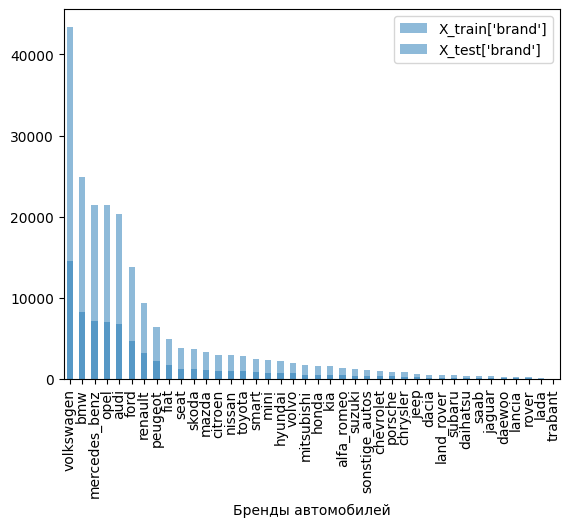

In [67]:
# Столбчатая диаграмма для категориальных данных
X_train['brand'].value_counts().plot(kind='bar', label="X_train['brand']", alpha=0.5)
X_test['brand'].value_counts().plot(kind='bar', label="X_test['brand']", alpha=0.5)
plt.legend()
plt.xlabel('Бренды автомобилей')
plt.show()

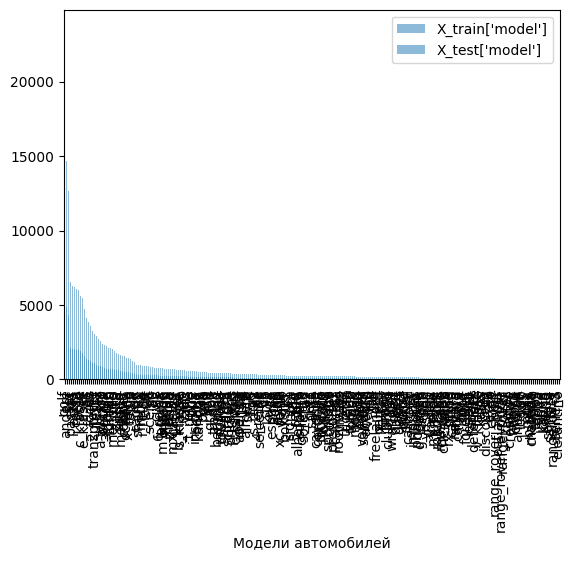

In [68]:
X_train['model'].value_counts().plot(kind='bar', label="X_train['model']", alpha=0.5)
X_test['model'].value_counts().plot(kind='bar', label="X_test['model']", alpha=0.5)
plt.legend()
plt.xlabel('Модели автомобилей')
plt.show()

По диаграммам выше видно, что есть статистическая схожесть выборок. Поэтому после выполнения transform() на тестовой выборке сохранится исходная зависимость между признаком и целевой меткой во время кодирования.

In [69]:
import category_encoders as ce

loo_encoder = ce.LeaveOneOutEncoder(return_df=True, cols=['model', 'brand'])
loo_encoder.fit(X_train, y_train)
X_train_loo = loo_encoder.transform(X_train, y_train)
X_test_loo = loo_encoder.transform(X_test)

In [70]:
print(X_train_loo.dtypes)

yearOfRegistration          int64
gearbox                     int64
powerPS                     int64
model                     float64
kilometer                   int64
monthOfRegistration         int64
brand                     float64
notRepairedDamage           int64
postalCode                  int64
vehicleType_andere        float64
vehicleType_bus           float64
vehicleType_cabrio        float64
vehicleType_coupe         float64
vehicleType_kleinwagen    float64
vehicleType_kombi         float64
vehicleType_limousine     float64
vehicleType_suv           float64
fuelType_andere           float64
fuelType_benzin           float64
fuelType_cng              float64
fuelType_diesel           float64
fuelType_elektro          float64
fuelType_hybrid           float64
fuelType_lpg              float64
dtype: object


In [71]:
X_train_loo.head(5)

,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,brand,notRepairedDamage,postalCode,vehicleType_andere,...,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_andere,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg
46576,2008,0,95,4459.395294,150000,11,8323.675910,0,68549,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
124673,1997,0,102,6474.038383,150000,5,8599.691737,0,85276,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
220679,2010,0,190,8820.073253,125000,11,9256.585326,0,34549,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
170125,2008,1,211,5308.509280,90000,12,10314.649247,0,50259,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
314984,2005,0,105,10551.760494,150000,8,6134.768405,0,15370,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [72]:
X_test_loo.head(5)

,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,brand,notRepairedDamage,postalCode,vehicleType_andere,...,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_andere,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg
110604,1998,0,145,4269.848837,150000,4,4125.254216,0,75365,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
242202,2009,0,155,1883.065668,150000,11,3275.813505,0,73525,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
81270,1997,0,116,6473.567578,150000,10,8599.367192,1,68219,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
96476,2001,0,90,4459.959624,150000,2,8323.562914,0,82008,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
362725,1997,0,75,10551.590250,150000,11,6134.857492,0,66386,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [73]:
X_train = X_train_loo
X_test = X_test_loo

## 7. Нормализация данных

Выполним приведение значений столбцов к отрезку *$[0;1]$* с помощью MinMax нормализации.

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.set_output(transform="pandas")
scaler.get_feature_names_out(input_features=X_train.columns)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
X_train.head(5)

,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,brand,notRepairedDamage,postalCode,vehicleType_andere,...,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_andere,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg
46576,0.826087,0.0,0.123123,0.126528,1.000000,0.909091,0.325524,0.0,0.682112,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
124673,0.586957,0.0,0.144144,0.187085,1.000000,0.363636,0.337975,0.0,0.851189,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
220679,0.869565,0.0,0.408408,0.257603,0.827586,0.909091,0.367608,0.0,0.338438,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
170125,0.826087,1.0,0.471471,0.152051,0.586207,1.000000,0.415337,0.0,0.497235,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
314984,0.760870,0.0,0.153153,0.309655,1.000000,0.636364,0.226783,0.0,0.144576,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [76]:
X_test.head(5)

,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,brand,notRepairedDamage,postalCode,vehicleType_andere,...,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_andere,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg
110604,0.608696,0.0,0.273273,0.120830,1.0,0.272727,0.136134,0.0,0.751008,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
242202,0.847826,0.0,0.303303,0.049087,1.0,0.909091,0.097816,0.0,0.732409,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
81270,0.586957,0.0,0.186186,0.187071,1.0,0.818182,0.337961,1.0,0.678776,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
96476,0.673913,0.0,0.108108,0.126545,1.0,0.090909,0.325519,0.0,0.818156,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
362725,0.586957,0.0,0.063063,0.309650,1.0,0.909091,0.226787,0.0,0.660248,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [77]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209931 entries, 46576 to 162011
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   yearOfRegistration      209931 non-null  float64
 1   gearbox                 209931 non-null  float64
 2   powerPS                 209931 non-null  float64
 3   model                   209931 non-null  float64
 4   kilometer               209931 non-null  float64
 5   monthOfRegistration     209931 non-null  float64
 6   brand                   209931 non-null  float64
 7   notRepairedDamage       209931 non-null  float64
 8   postalCode              209931 non-null  float64
 9   vehicleType_andere      209931 non-null  float64
 10  vehicleType_bus         209931 non-null  float64
 11  vehicleType_cabrio      209931 non-null  float64
 12  vehicleType_coupe       209931 non-null  float64
 13  vehicleType_kleinwagen  209931 non-null  float64
 14  vehicleType_komb

## 8. Обучение моделей

### Линейная регрессия

- Создаем модель и задаем гиперпараметры (конструктор)
- Тренируем модель (метод `fit`)
- Используем модель на новых данных (метод `predict`) и измеряем качество модели

Ищем коэффициенты (веса) $\beta_0, \beta_1, \dots, \beta_d$ _линейной модели_
$$
f(x) = \beta_0 + \sum_{j=1}^d \beta_j x_j,
$$
минимизирующие остаточную сумму квадратов (residual sum of squares):
$$
{\rm RSS} = \sum_{i=1}^N \left(f(x^{(i)}) - y^{(i)}\right)^2
$$

In [78]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [79]:
y_train_predict = model.predict(X_train)

In [80]:
y_train

46576      5899
124673      500
220679    14500
170125    19950
314984    10000
          ...  
159234     1200
343916     1800
175216     3300
195031     5499
162011     9150
Name: price, Length: 209931, dtype: int64

In [81]:
y_train_predict

array([ 3252.,  1548., 12596., ...,  3652., 10516., 13528.])

Ошибки ${\rm RSS}, {\rm MSE}, {\rm RMSE}$ на обучающих данных:

In [82]:
RSS_train = ((y_train_predict - y_train)**2).sum()
MSE_train = RSS_train/N_train
RMSE_train = (RSS_train/N_train)**.5
RSS_train, MSE_train, RMSE_train

(2874780507674.0, 13693930.42320572, 3700.5311001538307)

In [83]:
y_test_predict  = model.predict(X_test)

#### Измерение метрик качества

*Остаточная сумма квадратов* (*residual sum of squares*):
$$
{\rm RSS} = \sum_{i=1}^N \left(y^{(i)} - \widehat{y}^{(i)} \right)^2
$$
где
$$
\widehat{y}^{(i)} = \beta_0 + \sum_{j=1}^d \beta_j x_j^{(i)}
$$

*Полная сумма квадратов*:
$$
{\rm TSS} = \sum_{i=1}^N \left(y^{(i)} - \overline{y} \right)^2,
$$
где
$$
\overline{y} = \frac{1}{N} \sum_{i=1}^N y^{(i)}
$$

$$
\overline{y} = \beta_0 + \sum_{j=1}^d \beta_j \overline{x}_j
$$


*Сумма квадратов, обусловленная регрессией*:
$$
{\rm ESS} = \sum_{i=1}^N \left(\overline{y} - \widehat{y}^{(i)} \right)^2
$$

Можно показать, что
$$
{\rm TSS} = {\rm RSS} + {\rm ESS}
$$

*Коэффициент детерминации*, или *коэффициент регрессии Пирсона*:
$$
R^2 = 1 - \frac{{\rm RSS}}{{\rm TSS}} = \frac{{\rm ESS}}{{\rm TSS}}
$$
— доля объясняемого регрессией разброса относительно среднего (чем ближе к 1, тем модель лучше объясняет данные).

$$
0 \le R^2 \le 1
$$

$R = \sqrt{R^2}$ равно (по модулю) выборочной корреляции между $y^{(i)}$ и $\widehat{y}^{(i)}$

Если $d = 1$, то $R$ равен (по модулю) выборочной корреляции между $y^{(i)}$ и $x^{(i)}$.

*Средняя сумма квадратов отклонений* (MSE - Mean Squared Error)
$$
{\rm MSE} = \frac{1}{N} {\rm RSS} = \frac{1}{N} \sum_{i=1}^N \left(y^{(i)} - \widehat{y}^{(i)} \right)^2
$$

*Среднеквадратическая ошибка* (RMSE - Rooted Mean Squared Error)
$$
{\rm RMSE} = \sqrt{{\rm MSE}}
$$

MSE иногда называют *средней квадратической ошибкой*, что, конечно же, правильней отражает суть дела, но добавляет путаницы.

Ошибки ${\rm RSS}, {\rm MSE}, {\rm RMSE}$ на тестовых данных:

In [84]:
RSS_test = ((y_test_predict - y_test)**2).sum()
MSE_test = RSS_test/N_test
RMSE_test = (RSS_test/N_test)**.5
RSS_test, MSE_test, RMSE_test

(969605747297.0, 13855865.37621824, 3722.3467565795427)

In [85]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(13693930.42320572, 13855865.37621824, 0.6998324830986677, 0.6963984789526686)

In [86]:
RMSE_table = pd.DataFrame(columns=('train', 'test'))
RMSE_table.loc['Linear Regression, all features', :] = (RMSE_train, RMSE_test)

In [87]:
RMSE_table

,train,test
"Linear Regression, all features",3700.5311,3722.346757


Ошибки на тестовых и на обучающие данных очень близки!

In [88]:
R2_table = pd.DataFrame(columns=('train', 'test'))
R2_table.loc['Linear Regression, all features', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.699832,0.696398


Предсказание линейной моделью не очень хорошее, но это неплохое предсказание для линейной модели.

### Предсказание `price` от некоторых признаков

In [89]:
X.columns

Index(['yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer',
       'monthOfRegistration', 'brand', 'notRepairedDamage', 'postalCode',
       'vehicleType_andere', 'vehicleType_bus', 'vehicleType_cabrio',
       'vehicleType_coupe', 'vehicleType_kleinwagen', 'vehicleType_kombi',
       'vehicleType_limousine', 'vehicleType_suv', 'fuelType_andere',
       'fuelType_benzin', 'fuelType_cng', 'fuelType_diesel',
       'fuelType_elektro', 'fuelType_hybrid', 'fuelType_lpg'],
      dtype='object')

In [90]:
model = LinearRegression()
model.fit(X_train[['yearOfRegistration']], y_train)

y_train_predict = model.predict(X_train[['yearOfRegistration']])
y_test_predict  = model.predict(X_test[['yearOfRegistration']])

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5

RMSE_table.loc['Linear Regression, yearOfRegistration', :] = (RMSE_train, RMSE_test)

R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
R2_table.loc['Linear Regression, yearOfRegistration', :] = (R2_train, R2_test)

In [91]:
model = LinearRegression()
model.fit(X_train[['powerPS']], y_train)

y_train_predict = model.predict(X_train[['powerPS']])
y_test_predict  = model.predict(X_test[['powerPS']])

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5

RMSE_table.loc['Linear Regression, powerPS', :] = (RMSE_train, RMSE_test)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
R2_table.loc['Linear Regression, powerPS', :] = (R2_train, R2_test)

In [92]:
model = LinearRegression()
model.fit(X_train[['kilometer']], y_train)

y_train_predict = model.predict(X_train[['kilometer']])
y_test_predict  = model.predict(X_test[['kilometer']])

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5

RMSE_table.loc['Linear Regression, kilometer', :] = (RMSE_train, RMSE_test)

R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
R2_table.loc['Linear Regression, kilometer', :] = (R2_train, R2_test)

In [93]:
model = LinearRegression()
model.fit(X_train[['kilometer', 'powerPS', 'yearOfRegistration']], y_train)

y_train_predict = model.predict(X_train[['kilometer', 'powerPS', 'yearOfRegistration']])
y_test_predict  = model.predict(X_test[['kilometer', 'powerPS', 'yearOfRegistration']])

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5

RMSE_table.loc['Linear Regression, kilometer, powerPS, yearOfRegistration', :] = (RMSE_train, RMSE_test)

R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
R2_table.loc['Linear Regression, kilometer, powerPS, yearOfRegistration', :] = (R2_train, R2_test)

In [94]:
RMSE_table

,train,test
"Linear Regression, all features",3700.5311,3722.346757
"Linear Regression, yearOfRegistration",5723.922954,5760.148301
"Linear Regression, powerPS",5607.120753,5591.235345
"Linear Regression, kilometer",5922.282863,5948.93628
"Linear Regression, kilometer, powerPS, yearOfRegistration",4176.063153,4206.627777


In [95]:
R2_table

,train,test
"Linear Regression, all features",0.699832,0.696398
"Linear Regression, yearOfRegistration",0.281837,0.272995
"Linear Regression, powerPS",0.310847,0.315007
"Linear Regression, kilometer",0.231199,0.224559
"Linear Regression, kilometer, powerPS, yearOfRegistration",0.61773,0.612262


Три самых скоррелированных числовых признака `kilometer`, `powerPS`, `yearOfRegistration` по отдельности не определяют ключевую зависимость, но все вместе они дают наибольший вклад в предсказание `price`.

### Метод $k$ ближайших соседей ($k$NN, $k$ nearest neighbours)

In [96]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=7) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [97]:
RMSE_table.loc['k Nearest Neighbours, k=7', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",3700.5311,3722.346757
"Linear Regression, yearOfRegistration",5723.922954,5760.148301
"Linear Regression, powerPS",5607.120753,5591.235345
"Linear Regression, kilometer",5922.282863,5948.93628
"Linear Regression, kilometer, powerPS, yearOfRegistration",4176.063153,4206.627777
"k Nearest Neighbours, k=7",2389.928755,2816.221875


In [98]:
R2_table.loc['k Nearest Neighbours, k=7', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.699832,0.696398
"Linear Regression, yearOfRegistration",0.281837,0.272995
"Linear Regression, powerPS",0.310847,0.315007
"Linear Regression, kilometer",0.231199,0.224559
"Linear Regression, kilometer, powerPS, yearOfRegistration",0.61773,0.612262
"k Nearest Neighbours, k=7",0.8748,0.826218


In [99]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=15) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [100]:
RMSE_table.loc['k Nearest Neighbours, k=15', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",3700.5311,3722.346757
"Linear Regression, yearOfRegistration",5723.922954,5760.148301
"Linear Regression, powerPS",5607.120753,5591.235345
"Linear Regression, kilometer",5922.282863,5948.93628
"Linear Regression, kilometer, powerPS, yearOfRegistration",4176.063153,4206.627777
"k Nearest Neighbours, k=7",2389.928755,2816.221875
"k Nearest Neighbours, k=15",2657.082762,2889.685655


In [101]:
R2_table.loc['k Nearest Neighbours, k=15', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.699832,0.696398
"Linear Regression, yearOfRegistration",0.281837,0.272995
"Linear Regression, powerPS",0.310847,0.315007
"Linear Regression, kilometer",0.231199,0.224559
"Linear Regression, kilometer, powerPS, yearOfRegistration",0.61773,0.612262
"k Nearest Neighbours, k=7",0.8748,0.826218
"k Nearest Neighbours, k=15",0.845245,0.817034


In [102]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=25) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [103]:
RMSE_table.loc['k Nearest Neighbours, k=25', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",3700.5311,3722.346757
"Linear Regression, yearOfRegistration",5723.922954,5760.148301
"Linear Regression, powerPS",5607.120753,5591.235345
"Linear Regression, kilometer",5922.282863,5948.93628
"Linear Regression, kilometer, powerPS, yearOfRegistration",4176.063153,4206.627777
"k Nearest Neighbours, k=7",2389.928755,2816.221875
"k Nearest Neighbours, k=15",2657.082762,2889.685655
"k Nearest Neighbours, k=25",2822.32915,2978.663916


In [104]:
R2_table.loc['k Nearest Neighbours, k=25', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.699832,0.696398
"Linear Regression, yearOfRegistration",0.281837,0.272995
"Linear Regression, powerPS",0.310847,0.315007
"Linear Regression, kilometer",0.231199,0.224559
"Linear Regression, kilometer, powerPS, yearOfRegistration",0.61773,0.612262
"k Nearest Neighbours, k=7",0.8748,0.826218
"k Nearest Neighbours, k=15",0.845245,0.817034
"k Nearest Neighbours, k=25",0.825397,0.805592


In [105]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_selector
from sklearn.model_selection import GridSearchCV

k_arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15])

params = {
    'fit__n_neighbors': k_arr,
}

ppl = Pipeline([
    # Обучение:
    ('fit', KNeighborsRegressor())
])

model = GridSearchCV(ppl, params, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

model.best_score_, model.best_params_

(-8093064.920304745, {'fit__n_neighbors': 5})

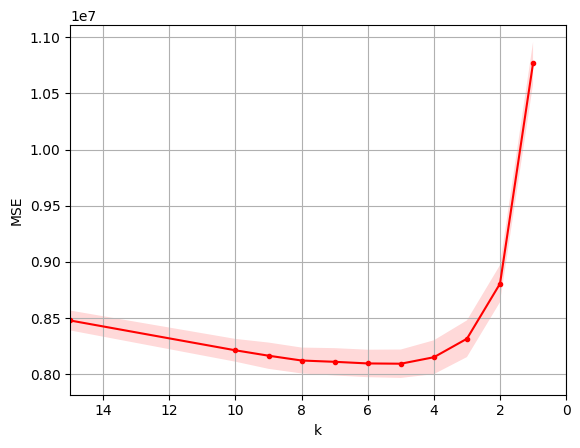

In [106]:
MSE_arr = -model.cv_results_['mean_test_score']
std_arr = model.cv_results_['std_test_score']
plt.plot(k_arr, MSE_arr, 'r.-')
plt.fill_between(k_arr, MSE_arr - std_arr, MSE_arr + std_arr, alpha=0.15, facecolor='red')
plt.xlim([max(k_arr), 0])
plt.grid()
plt.xlabel('k')
plt.ylabel('MSE')
pass

In [107]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [108]:
RMSE_table.loc['k Nearest Neighbours, k=5', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",3700.5311,3722.346757
"Linear Regression, yearOfRegistration",5723.922954,5760.148301
"Linear Regression, powerPS",5607.120753,5591.235345
"Linear Regression, kilometer",5922.282863,5948.93628
"Linear Regression, kilometer, powerPS, yearOfRegistration",4176.063153,4206.627777
"k Nearest Neighbours, k=7",2389.928755,2816.221875
"k Nearest Neighbours, k=15",2657.082762,2889.685655
"k Nearest Neighbours, k=25",2822.32915,2978.663916
"k Nearest Neighbours, k=5",2232.350415,2808.763701


In [109]:
R2_table.loc['k Nearest Neighbours, k=5', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.699832,0.696398
"Linear Regression, yearOfRegistration",0.281837,0.272995
"Linear Regression, powerPS",0.310847,0.315007
"Linear Regression, kilometer",0.231199,0.224559
"Linear Regression, kilometer, powerPS, yearOfRegistration",0.61773,0.612262
"k Nearest Neighbours, k=7",0.8748,0.826218
"k Nearest Neighbours, k=15",0.845245,0.817034
"k Nearest Neighbours, k=25",0.825397,0.805592
"k Nearest Neighbours, k=5",0.890765,0.827138


Метод ближайшего соседа оказался более точным, чем линейная регрессия в нашей задаче. Хотя ошибка всё ещё очень велика! Метод kNN в случае использования для регрессии, объекту присваивается среднее значение по k ближайшим к нему объектам, значения которых уже известны. Оптимальное значение гиперпараметра k = 5.

### Полносвязная нейронная сеть (Full-connected Neural Network)

In [122]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(10), alpha=0.0001, max_iter=200)
model.fit(X_train, y_train)

C:\Users\Илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=10)

In [123]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

RMSE_table.loc['Neural Network, layer_sizes=(10), alpha=0.0001', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",3700.5311,3722.346757
"Linear Regression, yearOfRegistration",5723.922954,5760.148301
"Linear Regression, powerPS",5607.120753,5591.235345
"Linear Regression, kilometer",5922.282863,5948.93628
"Linear Regression, kilometer, powerPS, yearOfRegistration",4176.063153,4206.627777
"k Nearest Neighbours, k=7",2389.928755,2816.221875
"k Nearest Neighbours, k=15",2657.082762,2889.685655
"k Nearest Neighbours, k=25",2822.32915,2978.663916
"k Nearest Neighbours, k=5",2232.350415,2808.763701
"Neural Network, layer_sizes=(20,10), alpha=0.0001",2490.432109,2531.582758


In [124]:
R2_table.loc['Neural Network, layer_sizes=(10), alpha=0.0001', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.699832,0.696398
"Linear Regression, yearOfRegistration",0.281837,0.272995
"Linear Regression, powerPS",0.310847,0.315007
"Linear Regression, kilometer",0.231199,0.224559
"Linear Regression, kilometer, powerPS, yearOfRegistration",0.61773,0.612262
"k Nearest Neighbours, k=7",0.8748,0.826218
"k Nearest Neighbours, k=15",0.845245,0.817034
"k Nearest Neighbours, k=25",0.825397,0.805592
"k Nearest Neighbours, k=5",0.890765,0.827138
"Neural Network, layer_sizes=(20,10), alpha=0.0001",0.864048,0.859572


Подберём оптимальные гиперпараметры нейронной сети.

In [145]:
param_grid = {
   'alpha': [0.0001, 0.001, 0.01, 0.1],
  'hidden_layer_sizes': [(5, 5), (5, 10), (10, 10), 
                          (20, 10), (20, 20), (30, 20)]
#     'alpha': [0.0001, 0.01, 0.1, 1],
#    'hidden_layer_sizes': [(5), (10), (15), (20)]
}

mlp = MLPRegressor(max_iter=200, random_state=42)

grid_search = GridSearchCV(mlp, param_grid, cv=3, n_jobs=6, verbose=4)
grid_search.fit(X_train, y_train)

print("Лучшие гиперпараметры:", grid_search.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Лучшие гиперпараметры: {'alpha': 0.001, 'hidden_layer_sizes': (30, 20)}


C:\Users\Илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [146]:
best_params = grid_search.best_params_
best_mlp = MLPRegressor(max_iter=400, random_state=42, **best_params)
best_mlp.fit(X_train, y_train)

y_train_predict = best_mlp.predict(X_train)
y_test_predict = best_mlp.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

RMSE_table.loc['Neural Network, layer_sizes=(best), alpha=best', :] = (RMSE_train, RMSE_test)
RMSE_table

C:\Users\Илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


,train,test
"Linear Regression, all features",3700.5311,3722.346757
"Linear Regression, yearOfRegistration",5723.922954,5760.148301
"Linear Regression, powerPS",5607.120753,5591.235345
"Linear Regression, kilometer",5922.282863,5948.93628
"Linear Regression, kilometer, powerPS, yearOfRegistration",4176.063153,4206.627777
"k Nearest Neighbours, k=7",2389.928755,2816.221875
"k Nearest Neighbours, k=15",2657.082762,2889.685655
"k Nearest Neighbours, k=25",2822.32915,2978.663916
"k Nearest Neighbours, k=5",2232.350415,2808.763701
"Neural Network, layer_sizes=(20,10), alpha=0.0001",2490.432109,2531.582758


In [147]:
R2_table.loc['Neural Network, layer_sizes=layer_sizes=(best), alpha=best', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.699832,0.696398
"Linear Regression, yearOfRegistration",0.281837,0.272995
"Linear Regression, powerPS",0.310847,0.315007
"Linear Regression, kilometer",0.231199,0.224559
"Linear Regression, kilometer, powerPS, yearOfRegistration",0.61773,0.612262
"k Nearest Neighbours, k=7",0.8748,0.826218
"k Nearest Neighbours, k=15",0.845245,0.817034
"k Nearest Neighbours, k=25",0.825397,0.805592
"k Nearest Neighbours, k=5",0.890765,0.827138
"Neural Network, layer_sizes=(20,10), alpha=0.0001",0.864048,0.859572


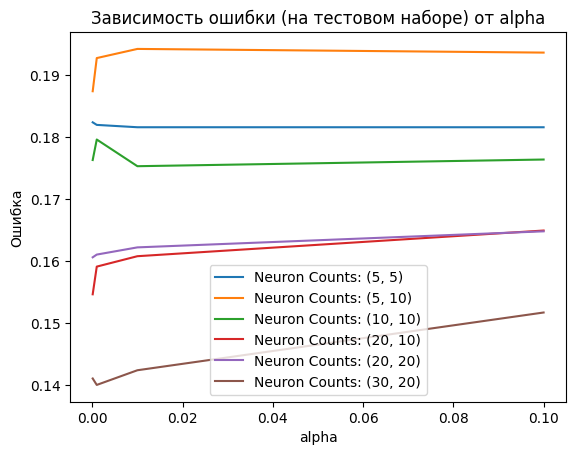

In [148]:
results = grid_search.cv_results_
#print(results)
alphas = [param['alpha'] for param in results['params']]
neuron_counts = [param['hidden_layer_sizes'] for param in results['params']]
mean_test_scores = results['mean_test_score']
errors = 1 - mean_test_scores

alphas_neuron_counts_errors = list(zip(alphas, neuron_counts, errors))

neuron_counts_data = {}
for alpha, neuron_count, error in alphas_neuron_counts_errors:
    if neuron_count not in neuron_counts_data:
        neuron_counts_data[neuron_count] = {'alpha': [], 'error': []}
    neuron_counts_data[neuron_count]['alpha'].append(alpha)
    neuron_counts_data[neuron_count]['error'].append(error)

for neuron_count, values in neuron_counts_data.items():
    plt.plot(values['alpha'], values['error'], label=f'Neuron Counts: {neuron_count}')

plt.xlabel('alpha')
plt.ylabel('Ошибка')
plt.title('Зависимость ошибки (на тестовом наборе) от alpha')
plt.legend()
plt.show()

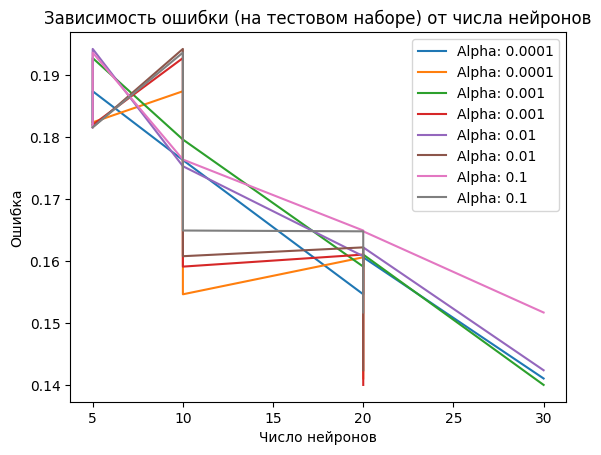

In [151]:
alpha_data = {}
for alpha, neuron_count, error in alphas_neuron_counts_errors:
    if alpha not in alpha_data:
        alpha_data[alpha] = {'neuron_count': [], 'error': []}
    alpha_data[alpha]['neuron_count'].append(neuron_count)
    alpha_data[alpha]['error'].append(error)

# Построение графиков
for alpha, values in alpha_data.items():
    plt.plot(values['neuron_count'], values['error'], label=f'Alpha: {alpha}')

plt.xlabel('Число нейронов')
plt.ylabel('Ошибка')
plt.title('Зависимость ошибки (на тестовом наборе) от числа нейронов')
plt.legend()
plt.show()

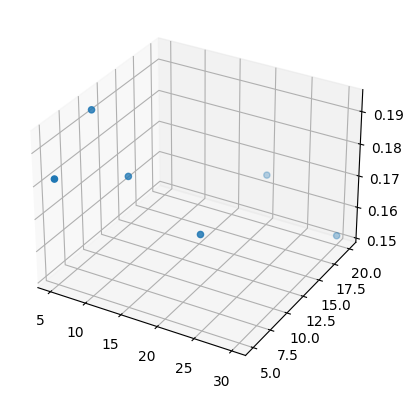

In [165]:
alpha_data = {}
for alpha, neuron_count, error in alphas_neuron_counts_errors:
    if alpha not in alpha_data:
        alpha_data[alpha] = {'neuron_count_l1': [], 'neuron_count_l2': [], 'error': []}
    alpha_data[alpha]['neuron_count_l1'].append(neuron_count[0])
    alpha_data[alpha]['neuron_count_l2'].append(neuron_count[1])
    alpha_data[alpha]['error'].append(error)

# Построение графиков
# for alpha, values in alpha_data.items():
#     plt.plot(values['neuron_count_l1'], values['neuron_count_l2'],  values['error'], label=f'Alpha: {alpha}')

# plt.xlabel('Число нейронов')
# plt.ylabel('Ошибка')
# plt.title('Зависимость ошибки (на тестовом наборе) от числа нейронов')
# plt.legend()
# plt.show()

#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax.plot_surface(values['neuron_count_l1'], values['neuron_count_l2'], values['error'], label=f'Alpha: {alpha}')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(values['neuron_count_l1'], values['neuron_count_l2'], values['error'])
plt.show()

### Случайный лес (Random Forest)

In [129]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200) # по умолчанию n_estimators=100
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [130]:
RMSE_table.loc['Random Forest', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",3700.5311,3722.346757
"Linear Regression, yearOfRegistration",5723.922954,5760.148301
"Linear Regression, powerPS",5607.120753,5591.235345
"Linear Regression, kilometer",5922.282863,5948.93628
"Linear Regression, kilometer, powerPS, yearOfRegistration",4176.063153,4206.627777
"k Nearest Neighbours, k=7",2389.928755,2816.221875
"k Nearest Neighbours, k=15",2657.082762,2889.685655
"k Nearest Neighbours, k=25",2822.32915,2978.663916
"k Nearest Neighbours, k=5",2232.350415,2808.763701
"Neural Network, layer_sizes=(20,10), alpha=0.0001",2490.432109,2531.582758


In [131]:
R2_table.loc['Random Forest', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.699832,0.696398
"Linear Regression, yearOfRegistration",0.281837,0.272995
"Linear Regression, powerPS",0.310847,0.315007
"Linear Regression, kilometer",0.231199,0.224559
"Linear Regression, kilometer, powerPS, yearOfRegistration",0.61773,0.612262
"k Nearest Neighbours, k=7",0.8748,0.826218
"k Nearest Neighbours, k=15",0.845245,0.817034
"k Nearest Neighbours, k=25",0.825397,0.805592
"k Nearest Neighbours, k=5",0.890765,0.827138
"Neural Network, layer_sizes=(20,10), alpha=0.0001",0.864048,0.859572


Оценки важности признаков.

In [132]:
importances = model.feature_importances_
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances

yearOfRegistration        0.453884
powerPS                   0.270424
brand                     0.098874
model                     0.093043
kilometer                 0.055317
postalCode                0.006858
vehicleType_cabrio        0.003836
notRepairedDamage         0.003017
monthOfRegistration       0.003011
gearbox                   0.002151
fuelType_diesel           0.002044
vehicleType_bus           0.002041
vehicleType_suv           0.001265
vehicleType_limousine     0.001159
fuelType_benzin           0.001133
vehicleType_coupe         0.000562
vehicleType_kombi         0.000492
vehicleType_kleinwagen    0.000461
fuelType_hybrid           0.000171
vehicleType_andere        0.000145
fuelType_lpg              0.000083
fuelType_elektro          0.000020
fuelType_cng              0.000008
fuelType_andere           0.000002
dtype: float64

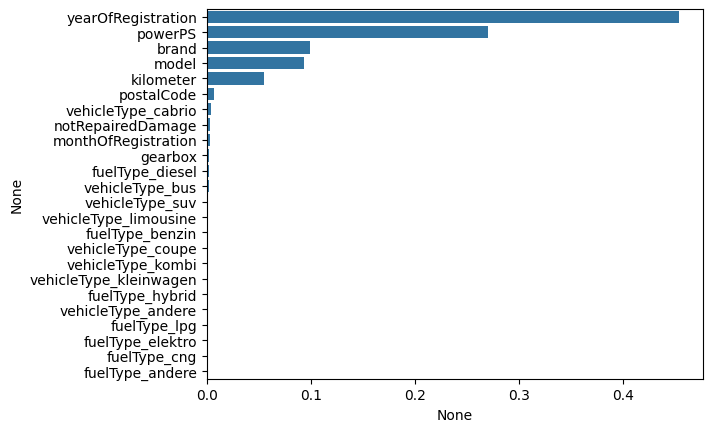

In [133]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

В данном случае наблюдается явное переобучение модели! Ошибка на обучающей выборки очень маленькая, а на тестовой - очень большай. Чтобы это исправить, можно изменить гиперпараметры:
- max_depth: определяет глубину или количество слоев, до которых у нас будут наши деревья решений.
- n_estimators: этот параметр управляет количеством деревьев решений, которые будут присутствовать в каждом слое. Этот и предыдущий параметр в значительной степени решают проблему переобучения.

### Градиентный бустинг (Gradient Boosting)

In [134]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=200) # по умолчанию n_estimators=100
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [135]:
RMSE_table.loc['Gradient Boosting', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",3700.5311,3722.346757
"Linear Regression, yearOfRegistration",5723.922954,5760.148301
"Linear Regression, powerPS",5607.120753,5591.235345
"Linear Regression, kilometer",5922.282863,5948.93628
"Linear Regression, kilometer, powerPS, yearOfRegistration",4176.063153,4206.627777
"k Nearest Neighbours, k=7",2389.928755,2816.221875
"k Nearest Neighbours, k=15",2657.082762,2889.685655
"k Nearest Neighbours, k=25",2822.32915,2978.663916
"k Nearest Neighbours, k=5",2232.350415,2808.763701
"Neural Network, layer_sizes=(20,10), alpha=0.0001",2490.432109,2531.582758


In [136]:
R2_table.loc['Gradient Boosting', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.699832,0.696398
"Linear Regression, yearOfRegistration",0.281837,0.272995
"Linear Regression, powerPS",0.310847,0.315007
"Linear Regression, kilometer",0.231199,0.224559
"Linear Regression, kilometer, powerPS, yearOfRegistration",0.61773,0.612262
"k Nearest Neighbours, k=7",0.8748,0.826218
"k Nearest Neighbours, k=15",0.845245,0.817034
"k Nearest Neighbours, k=25",0.825397,0.805592
"k Nearest Neighbours, k=5",0.890765,0.827138
"Neural Network, layer_sizes=(20,10), alpha=0.0001",0.864048,0.859572


In [137]:
importances = model.feature_importances_
importances

array([4.75176347e-01, 6.11628422e-03, 2.62338970e-01, 9.79639883e-02,
       6.71429063e-02, 7.62274763e-05, 6.88671184e-02, 4.45523521e-03,
       3.51010146e-03, 0.00000000e+00, 1.34901885e-03, 4.77687132e-03,
       3.10461598e-04, 5.73116889e-04, 8.46658079e-05, 8.24089725e-04,
       6.36881147e-04, 0.00000000e+00, 2.21915451e-04, 0.00000000e+00,
       5.47820438e-03, 0.00000000e+00, 9.75962474e-05, 0.00000000e+00])

In [138]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances

yearOfRegistration        0.475176
powerPS                   0.262339
model                     0.097964
brand                     0.068867
kilometer                 0.067143
gearbox                   0.006116
fuelType_diesel           0.005478
vehicleType_cabrio        0.004777
notRepairedDamage         0.004455
postalCode                0.003510
vehicleType_bus           0.001349
vehicleType_limousine     0.000824
vehicleType_suv           0.000637
vehicleType_kleinwagen    0.000573
vehicleType_coupe         0.000310
fuelType_benzin           0.000222
fuelType_hybrid           0.000098
vehicleType_kombi         0.000085
monthOfRegistration       0.000076
vehicleType_andere        0.000000
fuelType_andere           0.000000
fuelType_cng              0.000000
fuelType_elektro          0.000000
fuelType_lpg              0.000000
dtype: float64

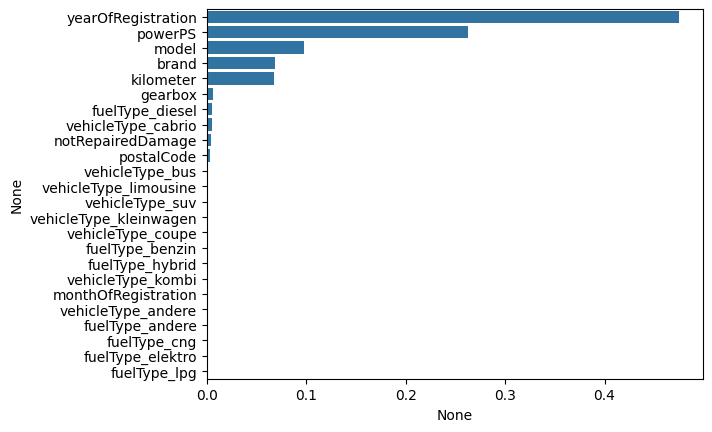

In [139]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

Градиентный бустинг показал один из лучших результатов. Примерно такой же, какой показала полносвязная сеть с двумя скрытыми слоями (20 и 10 нейронов).

Лучший результат у сети со слоями в 30  и 20 нейронов.